# **CODE FOR FORECASTING OF COVID-19 POSITIVE CASES**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Data cleaning**

Cleaning the data is the most important and crucial step. I have checked my correlation analysis between the variables in Excel itself and concluded my variables. As of now we will just consider only one county and continue our furthur steps on it.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/EQ_2021_Data_Sample.csv')
df=df.sort_values(by='countyFIPS')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_input=pd.DataFrame(df[375*6:375*7].sort_values(by='date'))
new_data=df_input[['date','confirmed_cases']]
new_data.index=new_data.date
new_data.drop('date', axis=1, inplace=True)
print(new_data)

            confirmed_cases
date                       
2020-01-22                0
2020-01-23                0
2020-01-24                0
2020-01-25                0
2020-01-26                0
...                     ...
2021-01-26             1058
2021-01-27             1074
2021-01-28             1075
2021-01-29             1075
2021-01-30             1075

[375 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Implementing the model**

The model we used for this problem statement is **LSTM**. Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

This is a behavior required in complex problem domains like machine translation, speech recognition, and more.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM



#creating train and test sets
dataset = new_data.values

train = dataset[0:300,:]
valid = dataset[300:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(3,len(train)):
    x_train.append(scaled_data[i-3:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 75 values, using past 3 from the train data
inputs = new_data[len(new_data) - len(valid) - 3:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(3,inputs.shape[0]):
    X_test.append(inputs[i-3:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

297/297 - 4s - loss: 0.0059


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

10.365907193813378


The below graph 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


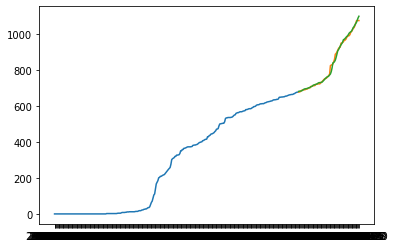

In [ ]:
train = new_data[:300]
valid = new_data[300:]
valid['Predictions'] = closing_price
plt.plot(train['confirmed_cases'])
plt.plot(valid[['confirmed_cases','Predictions']])

##Calculating average error
I have ran a **for** loop for 100 countys and calculated the average **Mean Squared Error**

In [ ]:
total=0
for i in range(100,200):
  df_input=pd.DataFrame(df[375*i:375*(i+1)].sort_values(by='date'))
  new_data=df_input[['date','confirmed_cases']]
  new_data.index=new_data.date
  new_data.drop('date', axis=1, inplace=True)
  
  
  from sklearn.preprocessing import MinMaxScaler
  from keras.models import Sequential
  from keras.layers import Dense, Dropout, LSTM

  #creating train and test sets
  dataset = new_data.values

  train = dataset[0:300,:]
  valid = dataset[300:,:]

  #converting dataset into x_train and y_train
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled_data = scaler.fit_transform(dataset)

  x_train, y_train = [], []
  for i in range(3,len(train)):
      x_train.append(scaled_data[i-3:i,0])
      y_train.append(scaled_data[i,0])
  x_train, y_train = np.array(x_train), np.array(y_train)

  x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

  # create and fit the LSTM network
  model = Sequential()
  model.add(LSTM(units=200, return_sequences=True, input_shape=(x_train.shape[1],1)))
  model.add(LSTM(units=50))
  model.add(Dense(1))

  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

  #predicting 246 values, using past 60 from the train data
  inputs = new_data[len(new_data) - len(valid) - 3:].values
  inputs = inputs.reshape(-1,1)
  inputs  = scaler.transform(inputs)

  X_test = []
  for i in range(3,inputs.shape[0]):
      X_test.append(inputs[i-3:i,0])
  X_test = np.array(X_test)

  X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
  closing_price = model.predict(X_test)
  closing_price = scaler.inverse_transform(closing_price)
  rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
  #print(rms)
  total=total+rms

print(total)

Epoch 14/100
297/297 - 1s - loss: 7.9887e-05
Epoch 15/100
297/297 - 1s - loss: 2.9265e-04
Epoch 16/100
297/297 - 1s - loss: 3.7286e-05
Epoch 17/100
297/297 - 1s - loss: 7.7231e-05
Epoch 18/100
297/297 - 1s - loss: 2.9057e-05
Epoch 19/100
297/297 - 1s - loss: 5.1583e-05
Epoch 20/100
297/297 - 1s - loss: 8.1538e-05
Epoch 21/100


KeyboardInterrupt: ignored

In [ ]:
print(total)

NameError: ignored

In [ ]:
model.save("/content/drive/MyDrive/EXL_model.h5")

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/EXL_model.h5')

In [ ]:
for i in range(1,3):
  df_input=pd.DataFrame(df[375*i:375*(i+1)].sort_values(by='date'))
  new_data=df_input[['date','confirmed_cases']]
  new_data.index=new_data.date
  new_data.drop('date', axis=1, inplace=True)  
  
  output=new_data[371:374].values
  print(output)
  

In [ ]:
print(lst)
len(lst)

[array([[5908.742]], dtype=float32), array([[12813.113]], dtype=float32), array([[3949.9268]], dtype=float32), array([[4136.6353]], dtype=float32), array([[5943.288]], dtype=float32), array([[3514.5828]], dtype=float32), array([[3880.868]], dtype=float32), array([[9467.803]], dtype=float32), array([[4605.7275]], dtype=float32), array([[3827.5713]], dtype=float32), array([[4802.7075]], dtype=float32), array([[3234.4688]], dtype=float32), array([[4599.986]], dtype=float32), array([[3640.3643]], dtype=float32), array([[3606.6248]], dtype=float32), array([[5491.6675]], dtype=float32), array([[5983.215]], dtype=float32), array([[3474.6038]], dtype=float32), array([[3306.559]], dtype=float32), array([[4792.02]], dtype=float32), array([[3619.867]], dtype=float32), array([[7545.9414]], dtype=float32), array([[5182.9272]], dtype=float32), array([[4618.4653]], dtype=float32), array([[7308.2827]], dtype=float32), array([[7539.792]], dtype=float32), array([[4772.451]], dtype=float32), array([[9767

3144

In [ ]:
con=pd.read_csv('/content/submission.csv')
con
red2=con['13thday_predictions']
red1=con['14thday_predictions']
red=con['15thday_predictions']
len(red)

3144

In [ ]:
con

,countyFIPS,date_predictions,predictions,1stday_predictions,2ndday_predictions,3rdday_predictions,4thday_predictions,5thday_predictions,6thday_predictions,7thday_predictions,8thday_predictions,9thday_predictions,10thday_predictions,11thday_predictions
0,1001,5596,5752,5798,5909,6031,6116,6236,6354,6464,6592,6718,6846,6984
1,1003,17922,18970,19101,19723,20436,20827,21460,22068,22576,23184,23757,24300,24874
2,1005,1931,1919,1935,1937,1936,1946,1948,1951,1958,1961,1965,1971,1975
3,1007,2284,2291,2300,2312,2321,2332,2343,2353,2365,2376,2387,2399,2411
4,1009,5655,5821,5861,5977,6104,6188,6312,6433,6544,6676,6805,6936,7078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,56037,3472,3517,3534,3579,3617,3648,3691,3730,3768,3811,3853,3896,3941
3140,56039,3078,3089,3111,3148,3167,3195,3226,3251,3281,3312,3341,3373,3405
3141,56041,1960,1963,1969,1973,1977,1983,1987,1992,1997,2002,2007,2012,2018
3142,56043,864,843,843,833,820,815,804,794,786,775,766,756,746


In [ ]:

df_input=pd.DataFrame(df[375:750].sort_values(by='date'))
new_data=df_input[['date','confirmed_cases']]

new_data.index=new_data.date
new_data=new_data.drop(['2021-01-30'])

new_data.loc[len(new_data.index)] = ['2021-01-30',red1[0] ]
new_data.loc[len(new_data.index)] = ['2021-01-31',red[0] ] 
new_data.drop('date', axis=1, inplace=True)  
output=new_data[373:376]
new_data.tail()
output

,confirmed_cases
date,
2021-01-29,5596
374,5752
375,5798


In [ ]:
lst1=[]
for i in range(1,3144):
  df_input=pd.DataFrame()
  new_data=df_input
  df2 = {'date': '2021-01-30', 'confirmed_cases': red2[i-1]} 
  new_data= new_data.append(df2, ignore_index = True) 

  df2 = {'date': '2021-01-30', 'confirmed_cases': red1[i-1]} 
  new_data= new_data.append(df2, ignore_index = True) 

  df2 = {'date': '2021-01-31', 'confirmed_cases': red[i-1]} 
  new_data= new_data.append(df2, ignore_index = True)   
  new_data.index=new_data.date
  #print(new_data.tail)
  new_data.drop('date', axis=1, inplace=True)  
  #print(new_data[374:377])
  output=new_data.values

  output=output.reshape(-1,1)
  output=scaler.transform(output)
  output=output.reshape((1,3,1))
  closing=model.predict(output)
  closing=scaler.inverse_transform(closing)
  lst1.append(closing)
  #print(closing)

KeyError: ignored

In [ ]:
lst=[]
for i in range(1,3176):
  df_input=pd.DataFrame(df[375*i:375*(i+1)].sort_values(by='date'))
  new_data=df_input[['date','confirmed_cases']]
  new_data.loc[len(new_data.index)] = ['2021-01-30',red1[i-1] ]
  new_data.loc[len(new_data.index)] = ['2021-01-31',red[i-1] ] 
  new_data.index=new_data.date
  new_data.drop('date', axis=1, inplace=True)  
  print(new_data[374:377])
  output=new_data[374:377].values

  output=output.reshape(-1,1)
  output=scaler.transform(output)
  print()
  output=output.reshape((1,3,1))
  closing=model.predict(output)
  closing=scaler.inverse_transform(closing)
  lst.append(closing)
  #print(closing)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             5596
2021-01-30             5752
2021-01-31             5798

            confirmed_cases
date                       
2021-01-30            17922
2021-01-30            18970
2021-01-31            19101

            confirmed_cases
date                       
2021-01-30             1931
2021-01-30             1919
2021-01-31             1935



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2284
2021-01-30             2291
2021-01-31             2300

            confirmed_cases
date                       
2021-01-30             5655
2021-01-30             5821
2021-01-31             5861

            confirmed_cases
date                       
2021-01-30             1075
2021-01-30             1058
2021-01-31             1059

            confirmed_cases
date                       
2021-01-30             1800
2021-01-30             1782
2021-01-31             1798



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            11918
2021-01-30            12582
2021-01-31            12672

            confirmed_cases
date                       
2021-01-30             3174
2021-01-30             3214
2021-01-31             3231

            confirmed_cases
date                       
2021-01-30             1688
2021-01-30             1679
2021-01-31             1686



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             3531
2021-01-30             3604
2021-01-31             3612

            confirmed_cases
date                       
2021-01-30              530
2021-01-30              498
2021-01-31              500

            confirmed_cases
date                       
2021-01-30             3182
2021-01-30             3198
2021-01-31             3230

            confirmed_cases
date                       
2021-01-30             1323
2021-01-30             1308
2021-01-31             1311



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1266
2021-01-30             1238
2021-01-31             1250

            confirmed_cases
date                       
2021-01-30             4857
2021-01-30             4937
2021-01-31             4993

            confirmed_cases
date                       
2021-01-30             5710
2021-01-30             5902
2021-01-31             5931

            confirmed_cases
date                       
2021-01-30             1001
2021-01-30              977
2021-01-31              982



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              674
2021-01-30              641
2021-01-31              647

            confirmed_cases
date                       
2021-01-30             3532
2021-01-30             3578
2021-01-31             3602

            confirmed_cases
date                       
2021-01-30             1293
2021-01-30             1265
2021-01-31             1275

            confirmed_cases
date                       
2021-01-30             8504
2021-01-30             8915
2021-01-31             8960



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             4261
2021-01-30             4340
2021-01-31             4377

            confirmed_cases
date                       
2021-01-30             3195
2021-01-30             3240
2021-01-31             3254

            confirmed_cases
date                       
2021-01-30             8089
2021-01-30             8456
2021-01-31             8507

            confirmed_cases
date                       
2021-01-30             8534
2021-01-30             8895
2021-01-31             8966



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             3492
2021-01-30             3538
2021-01-31             3567

            confirmed_cases
date                       
2021-01-30            12424
2021-01-30            13159
2021-01-31            13236

            confirmed_cases
date                       
2021-01-30             1848
2021-01-30             1845
2021-01-31             1851

            confirmed_cases
date                       
2021-01-30             3832
2021-01-30             3917
2021-01-31             3933



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2232
2021-01-30             2211
2021-01-31             2239

            confirmed_cases
date                       
2021-01-30              795
2021-01-30              766
2021-01-31              770

            confirmed_cases
date                       
2021-01-30             1930
2021-01-30             1917
2021-01-31             1933

            confirmed_cases
date                       
2021-01-30             1656
2021-01-30             1632
2021-01-31             1647



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             9369
2021-01-30             9819
2021-01-31             9889

            confirmed_cases
date                       
2021-01-30             6200
2021-01-30             6415
2021-01-31             6457

            confirmed_cases
date                       
2021-01-30            66323
2021-01-30            52228
2021-01-31            52350

            confirmed_cases
date                       
2021-01-30             1235
2021-01-30             1213
2021-01-31             1220



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             8134
2021-01-30             8512
2021-01-31             8551

            confirmed_cases
date                       
2021-01-30             2628
2021-01-30             2646
2021-01-31             2660

            confirmed_cases
date                       
2021-01-30            13679
2021-01-30            14501
2021-01-31            14596

            confirmed_cases
date                       
2021-01-30             8618
2021-01-30             9016
2021-01-31             9075



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1205
2021-01-30             1178
2021-01-31             1186

            confirmed_cases
date                       
2021-01-30             1273
2021-01-30             1243
2021-01-31             1255

            confirmed_cases
date                       
2021-01-30            29333
2021-01-30            29929
2021-01-31            30138

            confirmed_cases
date                       
2021-01-30             2170
2021-01-30             2163
2021-01-31             2179



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2597
2021-01-30             2613
2021-01-31             2628

            confirmed_cases
date                       
2021-01-30            10714
2021-01-30            11285
2021-01-31            11372

            confirmed_cases
date                       
2021-01-30            32747
2021-01-30            32880
2021-01-31            33059

            confirmed_cases
date                       
2021-01-30             1559
2021-01-30             1545
2021-01-31             1553



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            20697
2021-01-30            21831
2021-01-31            21963

            confirmed_cases
date                       
2021-01-30            12936
2021-01-30            13727
2021-01-31            13792

            confirmed_cases
date                       
2021-01-30             1017
2021-01-30              994
2021-01-31              998

            confirmed_cases
date                       
2021-01-30             2060
2021-01-30             2050
2021-01-31             2061



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2731
2021-01-30             2745
2021-01-31             2760

            confirmed_cases
date                       
2021-01-30             1512
2021-01-30             1496
2021-01-31             1504

            confirmed_cases
date                       
2021-01-30             3696
2021-01-30             3754
2021-01-31             3779

            confirmed_cases
date                       
2021-01-30             8091
2021-01-30             8454
2021-01-31             8505



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            20013
2021-01-30            21140
2021-01-31            21278

            confirmed_cases
date                       
2021-01-30              928
2021-01-30              899
2021-01-31              907

            confirmed_cases
date                       
2021-01-30             6762
2021-01-30             6994
2021-01-31             7054

            confirmed_cases
date                       
2021-01-30             3283
2021-01-30             3316
2021-01-31             3341



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            22241
2021-01-30            23349
2021-01-31            23517

            confirmed_cases
date                       
2021-01-30             6131
2021-01-30             6360
2021-01-31             6384

            confirmed_cases
date                       
2021-01-30             1464
2021-01-30             1446
2021-01-31             1453

            confirmed_cases
date                       
2021-01-30             1125
2021-01-30             1092
2021-01-31             1103



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2377
2021-01-30             2396
2021-01-31             2402

            confirmed_cases
date                       
2021-01-30               42
2021-01-30                4
2021-01-31                7

            confirmed_cases
date                       
2021-01-30              143
2021-01-30              105
2021-01-31              108

            confirmed_cases
date                       
2021-01-30            24851
2021-01-30            26001
2021-01-31            26060



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             3305
2021-01-30             3311
2021-01-31             3345

            confirmed_cases
date                       
2021-01-30                0
2021-01-30               34
2021-01-31               34

            confirmed_cases
date                       
2021-01-30               63
2021-01-30               29
2021-01-31               30

            confirmed_cases
date                       
2021-01-30              145
2021-01-30              111
2021-01-31              113



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             5702
2021-01-30             5902
2021-01-31             5923

            confirmed_cases
date                       
2021-01-30               16
2021-01-30               18
2021-01-31               18

            confirmed_cases
date                       
2021-01-30               53
2021-01-30               19
2021-01-31               19

            confirmed_cases
date                       
2021-01-30             1022
2021-01-30              986
2021-01-31              993



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             3670
2021-01-30             3754
2021-01-31             3759

            confirmed_cases
date                       
2021-01-30              252
2021-01-30              217
2021-01-31              219

            confirmed_cases
date                       
2021-01-30              976
2021-01-30              950
2021-01-31              952

            confirmed_cases
date                       
2021-01-30             1114
2021-01-30             1081
2021-01-31             1087



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              100
2021-01-30               67
2021-01-31               67

            confirmed_cases
date                       
2021-01-30             7394
2021-01-30             7716
2021-01-31             7742

            confirmed_cases
date                       
2021-01-30              302
2021-01-30              270
2021-01-31              271

            confirmed_cases
date                       
2021-01-30              941
2021-01-30              920
2021-01-31              920



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              542
2021-01-30              514
2021-01-31              514

            confirmed_cases
date                       
2021-01-30               38
2021-01-30                5
2021-01-31                5

            confirmed_cases
date                       
2021-01-30               67
2021-01-30               34
2021-01-31               34

            confirmed_cases
date                       
2021-01-30              275
2021-01-30              241
2021-01-31              243



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30               15
2021-01-30               19
2021-01-31               19

            confirmed_cases
date                       
2021-01-30              401
2021-01-30              366
2021-01-31              368

            confirmed_cases
date                       
2021-01-30              385
2021-01-30              340
2021-01-31              353

            confirmed_cases
date                       
2021-01-30                0
2021-01-30               34
2021-01-31               34



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30               18
2021-01-30               16
2021-01-31               16

            confirmed_cases
date                       
2021-01-30                0
2021-01-30               34
2021-01-31               34

            confirmed_cases
date                       
2021-01-30              264
2021-01-30              230
2021-01-31              232

            confirmed_cases
date                       
2021-01-30             9507
2021-01-30             9995
2021-01-31            10050



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            10413
2021-01-30            10965
2021-01-31            11004

            confirmed_cases
date                       
2021-01-30            15144
2021-01-30            16049
2021-01-31            16099

            confirmed_cases
date                       
2021-01-30             5981
2021-01-30             6136
2021-01-31             6175

            confirmed_cases
date                       
2021-01-30             5086
2021-01-30             5059
2021-01-31             5141



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              521
2021-01-30              487
2021-01-31              489

            confirmed_cases
date                       
2021-01-30             2222
2021-01-30             2223
2021-01-31             2234

            confirmed_cases
date                       
2021-01-30           469294
2021-01-30            72694
2021-01-31            72665

            confirmed_cases
date                       
2021-01-30            19205
2021-01-30            19999
2021-01-31            20157



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            14366
2021-01-30            15173
2021-01-31            15230

            confirmed_cases
date                       
2021-01-30           100810
2021-01-30            61507
2021-01-31            61646

            confirmed_cases
date                       
2021-01-30            42284
2021-01-30            39788
2021-01-31            39982

            confirmed_cases
date                       
2021-01-30             7404
2021-01-30             7747
2021-01-31             7768



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            16152
2021-01-30            17161
2021-01-31            17215

            confirmed_cases
date                       
2021-01-30            34990
2021-01-30            34720
2021-01-31            34813

            confirmed_cases
date                       
2021-01-30             1770
2021-01-30             1734
2021-01-31             1748

            confirmed_cases
date                       
2021-01-30             1637
2021-01-30             1610
2021-01-31             1619



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2629
2021-01-30             2621
2021-01-31             2638

            confirmed_cases
date                       
2021-01-30            25025
2021-01-30            25979
2021-01-31            26127

            confirmed_cases
date                       
2021-01-30             3329
2021-01-30             3337
2021-01-31             3364

            confirmed_cases
date                       
2021-01-30             1247
2021-01-30             1214
2021-01-31             1221



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              344
2021-01-30              305
2021-01-31              310

            confirmed_cases
date                       
2021-01-30             2575
2021-01-30             2555
2021-01-31             2576

            confirmed_cases
date                       
2021-01-30             1551
2021-01-30             1542
2021-01-31             1545

            confirmed_cases
date                       
2021-01-30             1831
2021-01-30             1800
2021-01-31             1819



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1562
2021-01-30             1546
2021-01-31             1553

            confirmed_cases
date                       
2021-01-30             1753
2021-01-30             1731
2021-01-31             1741

            confirmed_cases
date                       
2021-01-30              791
2021-01-30              745
2021-01-31              756

            confirmed_cases
date                       
2021-01-30             1926
2021-01-30             1900
2021-01-31             1911



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1974
2021-01-30             1947
2021-01-31             1961

            confirmed_cases
date                       
2021-01-30            12123
2021-01-30            12852
2021-01-31            12889

            confirmed_cases
date                       
2021-01-30             6163
2021-01-30             6349
2021-01-31             6378

            confirmed_cases
date                       
2021-01-30             5358
2021-01-30             5504
2021-01-31             5529



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1818
2021-01-30             1804
2021-01-31             1813

            confirmed_cases
date                       
2021-01-30              664
2021-01-30              629
2021-01-31              634

            confirmed_cases
date                       
2021-01-30             1204
2021-01-30             1164
2021-01-31             1176

            confirmed_cases
date                       
2021-01-30             1858
2021-01-30             1831
2021-01-31             1846



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            10596
2021-01-30            11066
2021-01-31            11156

            confirmed_cases
date                       
2021-01-30             1500
2021-01-30             1475
2021-01-31             1484

            confirmed_cases
date                       
2021-01-30             1024
2021-01-30             1005
2021-01-31             1005

            confirmed_cases
date                       
2021-01-30             8354
2021-01-30             8681
2021-01-31             8766



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1383
2021-01-30             1341
2021-01-31             1353

            confirmed_cases
date                       
2021-01-30             5482
2021-01-30             5618
2021-01-31             5648

            confirmed_cases
date                       
2021-01-30             1628
2021-01-30             1596
2021-01-31             1611

            confirmed_cases
date                       
2021-01-30             4382
2021-01-30             4463
2021-01-31             4489



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1348
2021-01-30             1317
2021-01-31             1324

            confirmed_cases
date                       
2021-01-30             3451
2021-01-30             3489
2021-01-31             3501

            confirmed_cases
date                       
2021-01-30             1555
2021-01-30             1534
2021-01-31             1539

            confirmed_cases
date                       
2021-01-30             3065
2021-01-30             3100
2021-01-31             3108



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             8041
2021-01-30             8335
2021-01-31             8384

            confirmed_cases
date                       
2021-01-30             2488
2021-01-30             2468
2021-01-31             2496

            confirmed_cases
date                       
2021-01-30              444
2021-01-30              409
2021-01-31              413

            confirmed_cases
date                       
2021-01-30             1905
2021-01-30             1896
2021-01-31             1901



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1597
2021-01-30             1591
2021-01-31             1592

            confirmed_cases
date                       
2021-01-30             3045
2021-01-30             3087
2021-01-31             3093

            confirmed_cases
date                       
2021-01-30             1031
2021-01-30              998
2021-01-31             1001

            confirmed_cases
date                       
2021-01-30             1965
2021-01-30             1954
2021-01-31             1966



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             5939
2021-01-30             6056
2021-01-31             6114

            confirmed_cases
date                       
2021-01-30             1333
2021-01-30             1306
2021-01-31             1315

            confirmed_cases
date                       
2021-01-30              861
2021-01-30              825
2021-01-31              831

            confirmed_cases
date                       
2021-01-30             3363
2021-01-30             3386
2021-01-31             3403



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             5234
2021-01-30             5354
2021-01-31             5381

            confirmed_cases
date                       
2021-01-30              730
2021-01-30              673
2021-01-31              687

            confirmed_cases
date                       
2021-01-30              653
2021-01-30              620
2021-01-31              623

            confirmed_cases
date                       
2021-01-30              717
2021-01-30              680
2021-01-31              686



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              646
2021-01-30              614
2021-01-31              618

            confirmed_cases
date                       
2021-01-30             1963
2021-01-30             1926
2021-01-31             1943

            confirmed_cases
date                       
2021-01-30              677
2021-01-30              638
2021-01-31              647

            confirmed_cases
date                       
2021-01-30             1602
2021-01-30             1568
2021-01-31             1580



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              877
2021-01-30              851
2021-01-31              854

            confirmed_cases
date                       
2021-01-30             2926
2021-01-30             2952
2021-01-31             2964

            confirmed_cases
date                       
2021-01-30             1652
2021-01-30             1631
2021-01-31             1640

            confirmed_cases
date                       
2021-01-30             7167
2021-01-30             7442
2021-01-31             7483



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              785
2021-01-30              730
2021-01-31              743

            confirmed_cases
date                       
2021-01-30            33624
2021-01-30            33359
2021-01-31            33577

            confirmed_cases
date                       
2021-01-30             1831
2021-01-30             1812
2021-01-31             1821

            confirmed_cases
date                       
2021-01-30             3310
2021-01-30             3358
2021-01-31             3371



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            10370
2021-01-30            10801
2021-01-31            10895

            confirmed_cases
date                       
2021-01-30              867
2021-01-30              827
2021-01-31              835

            confirmed_cases
date                       
2021-01-30              615
2021-01-30              577
2021-01-31              582

            confirmed_cases
date                       
2021-01-30            13517
2021-01-30            14266
2021-01-31            14348



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2341
2021-01-30             2355
2021-01-31             2360

            confirmed_cases
date                       
2021-01-30             1445
2021-01-30             1423
2021-01-31             1429

            confirmed_cases
date                       
2021-01-30              921
2021-01-30              886
2021-01-31              890

            confirmed_cases
date                       
2021-01-30             3327
2021-01-30             3324
2021-01-31             3357



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1117
2021-01-30             1058
2021-01-31             1074

            confirmed_cases
date                       
2021-01-30            27620
2021-01-30            28439
2021-01-31            28575

            confirmed_cases
date                       
2021-01-30             6467
2021-01-30             6662
2021-01-31             6704

            confirmed_cases
date                       
2021-01-30              552
2021-01-30              513
2021-01-31              517



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             3037
2021-01-30             3067
2021-01-31             3077

            confirmed_cases
date                       
2021-01-30               21
2021-01-30               13
2021-01-31               13

            confirmed_cases
date                       
2021-01-30            73210
2021-01-30            54489
2021-01-31            54630

            confirmed_cases
date                       
2021-01-30               72
2021-01-30               39
2021-01-31               39



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             3134
2021-01-30             3178
2021-01-31             3184

            confirmed_cases
date                       
2021-01-30            10122
2021-01-30            10589
2021-01-31            10646

            confirmed_cases
date                       
2021-01-30             1757
2021-01-30             1734
2021-01-31             1746

            confirmed_cases
date                       
2021-01-30             1734
2021-01-30             1725
2021-01-31             1730



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            56318
2021-01-30            47741
2021-01-31            47890

            confirmed_cases
date                       
2021-01-30              865
2021-01-30              836
2021-01-31              840

            confirmed_cases
date                       
2021-01-30             8231
2021-01-30             8579
2021-01-31             8620

            confirmed_cases
date                       
2021-01-30            87936
2021-01-30            58776
2021-01-31            58861



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2061
2021-01-30             2052
2021-01-31             2059

            confirmed_cases
date                       
2021-01-30             2707
2021-01-30             2668
2021-01-31             2700

            confirmed_cases
date                       
2021-01-30            26045
2021-01-30            27089
2021-01-31            27159

            confirmed_cases
date                       
2021-01-30             1048
2021-01-30             1005
2021-01-31             1014



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            85044
2021-01-30            58074
2021-01-31            58177

            confirmed_cases
date                       
2021-01-30            20466
2021-01-30            21541
2021-01-31            21631

            confirmed_cases
date                       
2021-01-30             2792
2021-01-30             2797
2021-01-31             2808

            confirmed_cases
date                       
2021-01-30             4874
2021-01-30             5020
2021-01-31             5030



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30          1078329
2021-01-30            67073
2021-01-31            67032

            confirmed_cases
date                       
2021-01-30            14377
2021-01-30            15180
2021-01-31            15266

            confirmed_cases
date                       
2021-01-30            12145
2021-01-30            12829
2021-01-31            12878

            confirmed_cases
date                       
2021-01-30              342
2021-01-30              302
2021-01-31              305



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             3131
2021-01-30             3148
2021-01-31             3167

            confirmed_cases
date                       
2021-01-30            25865
2021-01-30            26685
2021-01-31            26814

            confirmed_cases
date                       
2021-01-30              297
2021-01-30              263
2021-01-31              266

            confirmed_cases
date                       
2021-01-30             1139
2021-01-30             1110
2021-01-31             1117



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            38539
2021-01-30            37263
2021-01-31            37395

            confirmed_cases
date                       
2021-01-30             8276
2021-01-30             8619
2021-01-31             8666

            confirmed_cases
date                       
2021-01-30             3487
2021-01-30             3502
2021-01-31             3527

            confirmed_cases
date                       
2021-01-30           229917
2021-01-30            72064
2021-01-31            72096



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            18367
2021-01-30            19346
2021-01-31            19462

            confirmed_cases
date                       
2021-01-30              548
2021-01-30              513
2021-01-31              518

            confirmed_cases
date                       
2021-01-30           263504
2021-01-30            72766
2021-01-31            72787

            confirmed_cases
date                       
2021-01-30            86320
2021-01-30            58376
2021-01-31            58472



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             5386
2021-01-30             5477
2021-01-31             5523

            confirmed_cases
date                       
2021-01-30           267490
2021-01-30            72830
2021-01-31            72850

            confirmed_cases
date                       
2021-01-30           234637
2021-01-30            72173
2021-01-31            72210

            confirmed_cases
date                       
2021-01-30            31294
2021-01-30            31677
2021-01-31            31813



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            60899
2021-01-30            49854
2021-01-31            49996

            confirmed_cases
date                       
2021-01-30            17440
2021-01-30            18302
2021-01-31            18440

            confirmed_cases
date                       
2021-01-30            35223
2021-01-30            34608
2021-01-31            34795

            confirmed_cases
date                       
2021-01-30            28105
2021-01-30            28527
2021-01-31            28710



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30           101010
2021-01-30            61582
2021-01-31            61695

            confirmed_cases
date                       
2021-01-30            13311
2021-01-30            13997
2021-01-31            14083

            confirmed_cases
date                       
2021-01-30            10220
2021-01-30            10707
2021-01-31            10780

            confirmed_cases
date                       
2021-01-30               43
2021-01-30               10
2021-01-31               10



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1227
2021-01-30             1198
2021-01-31             1204

            confirmed_cases
date                       
2021-01-30            27352
2021-01-30            28100
2021-01-31            28240

            confirmed_cases
date                       
2021-01-30            25710
2021-01-30            26610
2021-01-31            26736

            confirmed_cases
date                       
2021-01-30            45466
2021-01-30            41828
2021-01-31            41969



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             8181
2021-01-30             8525
2021-01-31             8562

            confirmed_cases
date                       
2021-01-30             4191
2021-01-30             4250
2021-01-31             4274

            confirmed_cases
date                       
2021-01-30              260
2021-01-30              229
2021-01-31              229

            confirmed_cases
date                       
2021-01-30            43925
2021-01-30            40966
2021-01-31            41064



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             3483
2021-01-30             3540
2021-01-31             3551

            confirmed_cases
date                       
2021-01-30            69511
2021-01-30            53031
2021-01-31            53286

            confirmed_cases
date                       
2021-01-30            11612
2021-01-30            12157
2021-01-31            12240

            confirmed_cases
date                       
2021-01-30             5018
2021-01-30             5137
2021-01-31             5164



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            45618
2021-01-30            42125
2021-01-31            42214

            confirmed_cases
date                       
2021-01-30             1154
2021-01-30             1121
2021-01-31             1131

            confirmed_cases
date                       
2021-01-30            44881
2021-01-30            41595
2021-01-31            41708

            confirmed_cases
date                       
2021-01-30              603
2021-01-30              574
2021-01-31              575



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              264
2021-01-30              233
2021-01-31              233

            confirmed_cases
date                       
2021-01-30             1288
2021-01-30             1275
2021-01-31             1276

            confirmed_cases
date                       
2021-01-30            17179
2021-01-30            18214
2021-01-31            18293

            confirmed_cases
date                       
2021-01-30             3408
2021-01-30             3441
2021-01-31             3461



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1307
2021-01-30             1272
2021-01-31             1285

            confirmed_cases
date                       
2021-01-30              120
2021-01-30               85
2021-01-31               85

            confirmed_cases
date                       
2021-01-30              344
2021-01-30              311
2021-01-31              313

            confirmed_cases
date                       
2021-01-30              406
2021-01-30              370
2021-01-31              372



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              178
2021-01-30              146
2021-01-31              146

            confirmed_cases
date                       
2021-01-30             1816
2021-01-30             1775
2021-01-31             1790

            confirmed_cases
date                       
2021-01-30              160
2021-01-30              127
2021-01-31              127

            confirmed_cases
date                       
2021-01-30             2324
2021-01-30             2318
2021-01-31             2330



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            55588
2021-01-30            47539
2021-01-31            47637

            confirmed_cases
date                       
2021-01-30               62
2021-01-30               29
2021-01-31               29

            confirmed_cases
date                       
2021-01-30            18861
2021-01-30            19943
2021-01-31            20028

            confirmed_cases
date                       
2021-01-30             4375
2021-01-30             4433
2021-01-31             4465



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1146
2021-01-30             1121
2021-01-31             1125

            confirmed_cases
date                       
2021-01-30            47657
2021-01-30            43334
2021-01-31            43406

            confirmed_cases
date                       
2021-01-30             5168
2021-01-30             5303
2021-01-31             5321

            confirmed_cases
date                       
2021-01-30             4805
2021-01-30             4929
2021-01-31             4941



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              149
2021-01-30              114
2021-01-31              115

            confirmed_cases
date                       
2021-01-30              953
2021-01-30              901
2021-01-31              910

            confirmed_cases
date                       
2021-01-30             1051
2021-01-30             1015
2021-01-31             1022

            confirmed_cases
date                       
2021-01-30               15
2021-01-30               19
2021-01-31               19



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              292
2021-01-30              259
2021-01-31              261

            confirmed_cases
date                       
2021-01-30               45
2021-01-30               11
2021-01-31               12

            confirmed_cases
date                       
2021-01-30            34509
2021-01-30            34294
2021-01-31            34405

            confirmed_cases
date                       
2021-01-30               88
2021-01-30               55
2021-01-31               55



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              504
2021-01-30              473
2021-01-31              474

            confirmed_cases
date                       
2021-01-30              527
2021-01-30              473
2021-01-31              482

            confirmed_cases
date                       
2021-01-30             2703
2021-01-30             2711
2021-01-31             2725

            confirmed_cases
date                       
2021-01-30            17999
2021-01-30            19050
2021-01-31            19141



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              915
2021-01-30              886
2021-01-31              889

            confirmed_cases
date                       
2021-01-30              922
2021-01-30              867
2021-01-31              872

            confirmed_cases
date                       
2021-01-30             3620
2021-01-30             3698
2021-01-31             3703

            confirmed_cases
date                       
2021-01-30            12050
2021-01-30            12595
2021-01-31            12699



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30               61
2021-01-30               24
2021-01-31               25

            confirmed_cases
date                       
2021-01-30              620
2021-01-30              589
2021-01-31              592

            confirmed_cases
date                       
2021-01-30             1623
2021-01-30             1610
2021-01-31             1617

            confirmed_cases
date                       
2021-01-30             3008
2021-01-30             2997
2021-01-31             3025



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2362
2021-01-30             2374
2021-01-31             2379

            confirmed_cases
date                       
2021-01-30             1788
2021-01-30             1788
2021-01-31             1791

            confirmed_cases
date                       
2021-01-30              207
2021-01-30              164
2021-01-31              168

            confirmed_cases
date                       
2021-01-30              485
2021-01-30              451
2021-01-31              453



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              325
2021-01-30              293
2021-01-31              294

            confirmed_cases
date                       
2021-01-30             1824
2021-01-30             1817
2021-01-31             1821

            confirmed_cases
date                       
2021-01-30             1119
2021-01-30             1098
2021-01-31             1100

            confirmed_cases
date                       
2021-01-30            14326
2021-01-30            15255
2021-01-31            15288



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              398
2021-01-30              366
2021-01-31              366

            confirmed_cases
date                       
2021-01-30              622
2021-01-30              587
2021-01-31              593

            confirmed_cases
date                       
2021-01-30             1603
2021-01-30             1558
2021-01-31             1575

            confirmed_cases
date                       
2021-01-30              292
2021-01-30              260
2021-01-31              261



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30               43
2021-01-30                9
2021-01-31               10

            confirmed_cases
date                       
2021-01-30              673
2021-01-30              605
2021-01-31              631

            confirmed_cases
date                       
2021-01-30              189
2021-01-30              154
2021-01-31              156

            confirmed_cases
date                       
2021-01-30             2632
2021-01-30             2638
2021-01-31             2656



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1176
2021-01-30             1146
2021-01-31             1153

            confirmed_cases
date                       
2021-01-30              365
2021-01-30              334
2021-01-31              335

            confirmed_cases
date                       
2021-01-30            23523
2021-01-30            24695
2021-01-31            24766

            confirmed_cases
date                       
2021-01-30              660
2021-01-30              630
2021-01-31              631



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            72026
2021-01-30            54322
2021-01-31            54408

            confirmed_cases
date                       
2021-01-30            63211
2021-01-30            50993
2021-01-31            51121

            confirmed_cases
date                       
2021-01-30             9883
2021-01-30            10419
2021-01-31            10468

            confirmed_cases
date                       
2021-01-30             9202
2021-01-30             9632
2021-01-31             9711



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            63085
2021-01-30            50938
2021-01-31            51062

            confirmed_cases
date                       
2021-01-30            16753
2021-01-30            17777
2021-01-31            17885

            confirmed_cases
date                       
2021-01-30             6841
2021-01-30             7117
2021-01-31             7148

            confirmed_cases
date                       
2021-01-30             8200
2021-01-30             8553
2021-01-31             8613



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            12746
2021-01-30            13314
2021-01-31            13456

            confirmed_cases
date                       
2021-01-30            44073
2021-01-30            40913
2021-01-31            41109

            confirmed_cases
date                       
2021-01-30            20550
2021-01-30            21527
2021-01-31            21679

            confirmed_cases
date                       
2021-01-30            36662
2021-01-30            35741
2021-01-31            35946



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            20566
2021-01-30            21501
2021-01-31            21666

            confirmed_cases
date                       
2021-01-30             3023
2021-01-30             3037
2021-01-31             3057

            confirmed_cases
date                       
2021-01-30            16504
2021-01-30            17135
2021-01-31            17398

            confirmed_cases
date                       
2021-01-30             2649
2021-01-30             2655
2021-01-31             2667



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            29177
2021-01-30            29523
2021-01-31            29732

            confirmed_cases
date                       
2021-01-30           172082
2021-01-30            69595
2021-01-31            69663

            confirmed_cases
date                       
2021-01-30             1529
2021-01-30             1508
2021-01-31             1517

            confirmed_cases
date                       
2021-01-30             9688
2021-01-30            10105
2021-01-31            10172



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             8642
2021-01-30             8943
2021-01-31             9013

            confirmed_cases
date                       
2021-01-30            15318
2021-01-30            16096
2021-01-31            16212

            confirmed_cases
date                       
2021-01-30            27723
2021-01-30            28452
2021-01-31            28611

            confirmed_cases
date                       
2021-01-30             7222
2021-01-30             7501
2021-01-31             7539



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             3363
2021-01-30             3406
2021-01-31             3421

            confirmed_cases
date                       
2021-01-30             1390
2021-01-30             1369
2021-01-31             1375

            confirmed_cases
date                       
2021-01-30            81530
2021-01-30            56857
2021-01-31            57026

            confirmed_cases
date                       
2021-01-30            30783
2021-01-30            30887
2021-01-31            31124



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             5254
2021-01-30             5326
2021-01-31             5374

            confirmed_cases
date                       
2021-01-30             1225
2021-01-30             1189
2021-01-31             1198

            confirmed_cases
date                       
2021-01-30             5077
2021-01-30             5205
2021-01-31             5228

            confirmed_cases
date                       
2021-01-30             1216
2021-01-30             1189
2021-01-31             1194



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30              868
2021-01-30              839
2021-01-31              841

            confirmed_cases
date                       
2021-01-30             1692
2021-01-30             1658
2021-01-31             1673

            confirmed_cases
date                       
2021-01-30             1497
2021-01-30             1478
2021-01-31             1484

            confirmed_cases
date                       
2021-01-30             2569
2021-01-30             2567
2021-01-31             2588



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             4035
2021-01-30             4112
2021-01-31             4126

            confirmed_cases
date                       
2021-01-30             9905
2021-01-30            10311
2021-01-31            10402

            confirmed_cases
date                       
2021-01-30             6455
2021-01-30             6602
2021-01-31             6672

            confirmed_cases
date                       
2021-01-30           100334
2021-01-30            61394
2021-01-31            61525



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2072
2021-01-30             2059
2021-01-31             2068

            confirmed_cases
date                       
2021-01-30             9736
2021-01-30            10138
2021-01-31            10215

            confirmed_cases
date                       
2021-01-30             5648
2021-01-30             5815
2021-01-31             5839

            confirmed_cases
date                       
2021-01-30             1285
2021-01-30             1253
2021-01-31             1265



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             1531
2021-01-30             1515
2021-01-31             1518

            confirmed_cases
date                       
2021-01-30            21697
2021-01-30            22615
2021-01-31            22810

            confirmed_cases
date                       
2021-01-30            52420
2021-01-30            45776
2021-01-31            45949

            confirmed_cases
date                       
2021-01-30            26395
2021-01-30            27126
2021-01-31            27325



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             2545
2021-01-30             2533
2021-01-31             2556

            confirmed_cases
date                       
2021-01-30              993
2021-01-30              960
2021-01-31              968

            confirmed_cases
date                       
2021-01-30             1829
2021-01-30             1809
2021-01-31             1820

            confirmed_cases
date                       
2021-01-30            28468
2021-01-30            28925
2021-01-31            29134



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            24370
2021-01-30            25268
2021-01-31            25439

            confirmed_cases
date                       
2021-01-30             9585
2021-01-30            10041
2021-01-31            10095

            confirmed_cases
date                       
2021-01-30           370642
2021-01-30            73279
2021-01-31            73272

            confirmed_cases
date                       
2021-01-30             5332
2021-01-30             5442
2021-01-31             5483



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30             6954
2021-01-30             7137
2021-01-31             7192

            confirmed_cases
date                       
2021-01-30            16639
2021-01-30            17497
2021-01-31            17649

            confirmed_cases
date                       
2021-01-30             3254
2021-01-30             3255
2021-01-31             3277

            confirmed_cases
date                       
2021-01-30           102897
2021-01-30            61855
2021-01-31            61992



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value

            confirmed_cases
date                       
2021-01-30            33447
2021-01-30            33261
2021-01-31            33439

            confirmed_cases
date                       
2021-01-30           106691
2021-01-30            62479
2021-01-31            62636

            confirmed_cases
date                       
2021-01-30            29432
2021-01-30            29886
2021-01-31            30068

            confirmed_cases
date                       
2021-01-30            59207
2021-01-30            48922
2021-01-31            49116

            confirmed_cases
date                       
2021-01-30            50201
2021-01-30            44425
2021-01-31            44641

            confirmed_cases
date                       
2021-01-30             5428



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

ValueError: ignored

In [ ]:
Df = pd.DataFrame()
Df['date_predictions'] = lst1
Df.to_csv('/content/16thday.csv', index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


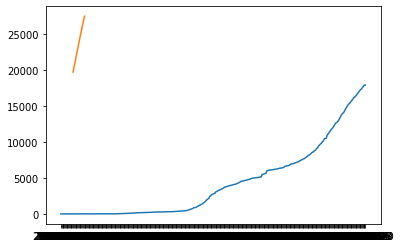

In [ ]:
predictions = pd.read_csv('/content/drive/MyDrive/Final_submission.csv')


df_input=pd.DataFrame(df[375*2:375*(2+1)].sort_values(by='date'))
new_data=df_input[['date','confirmed_cases']]
new_data.index=new_data.date
new_data.drop('date', axis=1, inplace=True)
  
prediction=pd.DataFrame(predictions[15*1:15*(2)])
predict=prediction['Confirmed_cases']
  
train = new_data[:375]
plt.plot(train['confirmed_cases'])
plt.plot(predict)

In [ ]:
Df = pd.DataFrame(new_data)
 
Df.to_csv('/content/thday.csv', index=False)